# Assignment1 - Part A

### Step 01: Import pyspark and initialize Spark

In [1]:
# if you dont have pyspark on your own laptop, please pip it to install
# !pip install pyspark

#import SparkContext, SparkConf, and SparkSession
from pyspark import SparkContext, SparkConf 
from pyspark.sql import SparkSession

# Create or get an SparkContext
sc = SparkContext.getOrCreate()

# If there is no existing spark context, we now create a new context, I decide to use 3 cores
if (sc is None):
    sc = SparkContext(master="local[3]", appName="FIT5202 Assignment1")

spark = SparkSession(sparkContext=sc)

### Step 02: Create Resilient Distributed Datasets(RDDs)

In [2]:
# Read textFile of two books and return it as two RDDs
# The path of text file should be changed before run this code
agile_rdd = sc.textFile("/Users/frank/Desktop/Sem4/FIT5202 /Assignment1/Agile Processes  in Software Engineering  and Extreme Programming.txt",3)
scrum_rdd = sc.textFile("/Users/frank/Desktop/Sem4/FIT5202 /Assignment1/Scrum Handbook.txt",3)
#count the lines of two books by the action count()
lines_count_agile = agile_rdd.count()
lines_count_scrum = scrum_rdd.count()

In [3]:
#print total number of lines of the two books
print('The number of lines of "Agile Processes" is ' + str(lines_count_agile))
print('The number of lines of "Scrum Handbook" is ' + str(lines_count_scrum))

The number of lines of "Agile Processes" is 21569
The number of lines of "Scrum Handbook" is 4617


### Step 03: Cleaning/Manipulating text

In [4]:
# cleaning line 
def cleaning_text(line):
    """
    Clean a line without no non_alphabets, no Uppercase, no trailing spaces

    Args:
        line: each line(string)

    Returns:
        cleaned lines

    """
    return remove_spaces(remove_non_alphabets_change_lowercase(line))

# remove leading or trailing spaces
def remove_spaces(line):
    """
    Clean a line to trailing spaces

    Args:
        line: each line(string)

    Returns:
        string without trailing spaces

    """
    return line.strip()

# remove all characters which are not alphabets except space(s).
# Changes all upper case letters to lowercase..
def remove_non_alphabets_change_lowercase(line):
    """
    Clean a line to no non_alphabets, no Uppercase

    Args:
        line: each line(string)

    Returns:
        string without non_alphabets, Uppercase

    """
    length = len(line)
    string = list(line)
    for index in range(0,length):
        if string[index].isalpha() is False:
            string[index] = " "
        if string[index].islower() is False:
            string[index] = string[index].lower()
    return ''.join(string)

cleaned_agile_line = agile_rdd.map(lambda x:cleaning_text(x))
cleaned_scrum_line = scrum_rdd.map(lambda x:cleaning_text(x))

In [5]:
# Print the cleaning text of agile
cleaned_agile_line.collect()

['lnbip',
 '',
 '',
 'i helen sharp',
 '',
 'tracy hall  eds',
 '',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 '',
 'th international conference  xp',
 'edinburgh  uk  may',
 'proceedings',
 '',
 '',
 'springer open',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'lecture notes',
 '',
 'in business information processing',
 '',
 '',
 'series editors',
 '',
 'wil van der aalst',
 '',
 'eindhoven technical university  eindhoven  the netherlands',
 'john mylopoulos',
 '',
 'university of trento  povo  italy',
 'michael rosemann',
 '',
 'queensland university of technology  brisbane  qld  australia',
 'michael j  shaw',
 '',
 'university of illinois  urbana champaign  il  usa',
 'clemens szyperski',
 '',
 'microsoft research  redmond  wa  usa',
 '',
 '',
 '',
 'more information about this series at http   www springer com series',
 '',
 '',
 '',
 'helen sharp   tracy hall  eds',
 '',
 '',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 '

In [6]:
# Print the cleaning text of scrum
cleaned_scrum_line.collect()

['jeff sutherland s',
 '',
 'scrum handbook',
 '',
 '',
 '',
 '',
 'everything',
 'you need',
 'to know',
 'to start',
 '',
 'a scrum project',
 'in your',
 'organization',
 '',
 'scrum',
 '',
 'training',
 '',
 'institute',
 '',
 'm w press',
 '',
 '',
 '',
 'this book is dedicated to nobel laureate muhammad yunus and the',
 'grameen bank for originating microenterprise development and the',
 'accion international president s advisory board  responsible for much of',
 'microenterprise development in the western hemisphere',
 '',
 'the strategy for bootstrapping the poor out of poverty has been',
 'a model for freeing hundreds of thousands of software developers from',
 'developer abuse caused by poor management practices',
 '',
 'thanks to the reviewers of the text who include among many others',
 '',
 'tom poppendieck',
 '',
 'hen rick kniberg',
 '',
 'rowan bunning',
 '',
 'clifford thompson',
 '',
 '',
 '',
 'about this book',
 '',
 'this manual is based on the scrum papers  publis

### Step 04: Transforming the Data/Counting the words

In [7]:
# split words then filter space
split_agile = cleaned_agile_line.flatMap(lambda line:line.split(" "))\
                                 .filter(lambda line: line != '')
split_scrum = cleaned_scrum_line.flatMap(lambda line:line.split(" "))\
                                 .filter(lambda line: line != '')

# get results
agile_result = split_agile.map(lambda x: (x, 1))\
                          .reduceByKey(lambda x, y: x + y)\
                          .map(lambda x:(x[1],x[0]))\
                          .sortByKey(ascending=False, numPartitions=None)
scrum_result = split_scrum.map(lambda x: (x, 1))\
                          .reduceByKey(lambda x, y: x + y)\
                          .map(lambda x:(x[1],x[0]))\
                          .sortByKey(ascending=False, numPartitions=None)

In [8]:
# Take the top 20 results of scrum
scrum_result.take(20)

[(1238, 'the'),
 (538, 'of'),
 (534, 'and'),
 (478, 'to'),
 (454, 'a'),
 (399, 'scrum'),
 (363, 'in'),
 (348, 'is'),
 (273, 'team'),
 (233, 'product'),
 (195, 'for'),
 (182, 'that'),
 (172, 'it'),
 (149, 'on'),
 (147, 'sprint'),
 (142, 'this'),
 (132, 'with'),
 (124, 'as'),
 (119, 'are'),
 (119, 'at')]

In [9]:
# Take the top 20 results of agile
agile_result.take(20)

[(8161, 'the'),
 (3975, 'and'),
 (3954, 'of'),
 (3751, 'to'),
 (3101, 'in'),
 (2755, 'a'),
 (1541, 'is'),
 (1356, 'that'),
 (1195, 'for'),
 (1027, 'on'),
 (1023, 'as'),
 (980, 'we'),
 (970, 'with'),
 (931, 'software'),
 (915, 'this'),
 (785, 'are'),
 (784, 'agile'),
 (775, 'it'),
 (748, 'development'),
 (711, 'was')]

### Step 05: Removing Stop Words

In [10]:
# if you dont have nltk on your own laptop, please pip it to install
#!pip install nltk
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
agile_remove_stop_words = agile_result.filter(lambda word: word[1] not in stop_words)
scrum_remove_stop_words = scrum_result.filter(lambda word: word[1] not in stop_words)

In [11]:
# agile_example
agile_remove_stop_words.take(5)

[(931, 'software'),
 (784, 'agile'),
 (748, 'development'),
 (592, 'team'),
 (461, 'work')]

In [12]:
# scrum example
scrum_remove_stop_words.take(5)

[(399, 'scrum'),
 (273, 'team'),
 (233, 'product'),
 (147, 'sprint'),
 (98, 'development')]

In [13]:
# Number of unique words of two books before removing unique words
print("Before removing stop words, the numer of unique words of agile is " +\
      str(agile_result.count()))
print("Before removing stop words, the numer of unique words of scrum is " +\
      str(scrum_result.count()))

Before removing stop words, the numer of unique words of agile is 9103
Before removing stop words, the numer of unique words of scrum is 2979


In [14]:
# Number of unique words of two books after removing unique words
print("After removing stop words, the numer of unique words of agile is " +\
      str(agile_remove_stop_words.count()))
print("After removing stop words, the numer of unique words of scrum is " +\
      str(scrum_remove_stop_words.count()))

After removing stop words, the numer of unique words of agile is 8962
After removing stop words, the numer of unique words of scrum is 2857


### Step 06: Find the average occurrence of a word

In [15]:
#get the total number of agile
total_number_agile = sc.accumulator(0) # Create Accumulator[int] intitialized to 0
def find_total_number(number):
    """
    input: number(string)
    use accumulator to get the total number
    """
    global total_number_agile # make the global variable accessible
    total_number_agile += number
    
calculate_total_number = agile_remove_stop_words.map(lambda x:find_total_number(x[0]))
calculate_total_number.collect()
total_num_agile = total_number_agile.value
print(total_num_agile)

80978


In [16]:
#get the total number of scrum
total_number_scrum = sc.accumulator(0) # Create Accumulator[int] intitialized to 0
def find_total_number_scrum(number):
    """
    input: number(string)
    use accumulator to get the total number
    """
    global total_number_scrum # make the global variable accessible
    total_number_scrum += number
    
calculate_total_number_scrum = scrum_remove_stop_words.map(lambda x:find_total_number_scrum(x[0]))
calculate_total_number_scrum.collect()
total_num_scrum = total_number_scrum.value
print(total_num_scrum)

10937


In [17]:
# find the unique words
agile_join = agile_remove_stop_words.map(lambda x:(x[1],x[0]))
scrum_join = scrum_remove_stop_words.map(lambda x:(x[1],x[0]))
# this should be a full outer join, both left, join, and right part
unique_word_two_book = agile_join.fullOuterJoin(scrum_join)
unique_number = unique_word_two_book.count()

In [18]:
# calculate 
average_occurrence = (total_num_agile + total_num_scrum) / unique_number
print("The average occurrence of a word is: " + str(average_occurrence))

The average occurrence of a word is: 9.470891293147861


### Step 07: Exploratory data analysis

Q1: Compare the distribution of words in Book1 and Book2

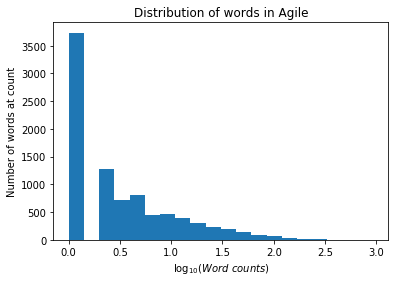

In [19]:
# Agile Book
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
def log_transfer(num):
    return math.log10(num)
agile_list = agile_remove_stop_words.map(lambda x:log_transfer(x[0]))\
                                    .collect()
minm = min(agile_list)
maxm = max(agile_list)

# plot
plt.hist(agile_list, bins = 20, range = (minm, maxm))
plt.title('Distribution of words in Agile')
plt.xlabel('$\log_{10}(Word\ counts)$')
plt.ylabel('Number of words at count')
plt.show()

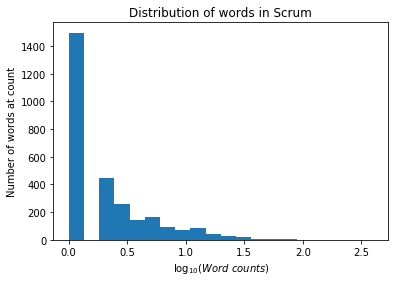

In [20]:
# Scrum Book
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
def log_transfer(num):
    return math.log10(num)
scrum_list = scrum_remove_stop_words.map(lambda x:log_transfer(x[0]))\
                                    .collect()
minm = min(scrum_list)
maxm = max(scrum_list)

# plot
plt.hist(scrum_list, bins = 20, range = (minm, maxm))
plt.title('Distribution of words in Scrum')
plt.xlabel('$\log_{10}(Word\ counts)$')
plt.ylabel('Number of words at count')
plt.show()

Understanding: In spite of the number of words of two books are different, Agile with 80978 words (removing stopping words), and Scrum with 10937 words(removing stopping words). The words distributions of word counts of the two books are quite similar.

Q2: Compare the top 15 most common words in Book1 and Book2.

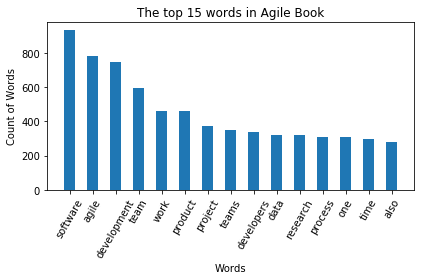

In [21]:
# agile book
# prepare data

agile_list_y = agile_remove_stop_words.map(lambda x:(x[0]))\
                                    .take(15)
agile_list_x = agile_remove_stop_words.map(lambda x:(x[1]))\
                                    .take(15)
bar_width = 0.5
# plot
plt.bar(agile_list_x, agile_list_y, bar_width, align='center', color='C0')
plt.xlabel('Words')
plt.xticks(rotation=60)
plt.ylabel('Count of Words')
plt.title('The top 15 words in Agile Book')
plt.tight_layout()
plt.show()

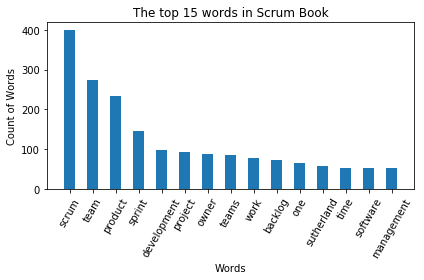

In [22]:
# scrum book
# prepare data

scrum_list_y = scrum_remove_stop_words.map(lambda x:(x[0]))\
                                    .take(15)
scrum_list_x = scrum_remove_stop_words.map(lambda x:(x[1]))\
                                    .take(15)
bar_width = 0.5
# plot
plt.bar(scrum_list_x, scrum_list_y, bar_width, align='center', color='C0')
plt.xlabel('Words')
plt.xticks(rotation=60)
plt.ylabel('Count of Words')
plt.title('The top 15 words in Scrum Book')
plt.tight_layout()
plt.show()

Understanding: Considering the top 15 words in these two books, the number of each word in Agile Book is higher than that in Scrum Book. Besides, these two books share some commen words, such as team, project, software, work, and development, which shows these two book contains similary content about the software development and project lifecycle. However, the agile book is more concentrated on the software and development, because the top 1 and 3 words are software and development. The Scrum Book is more focusing on the team, and product management, because the top 2, 3, and 4 words are team, project, and sprint.